If my read and write operations are weighted such that they assign more write and read to neurons closer within the  Hamming distance then how does this change the pattern perspective exponential decay? 

What should the decay on the read and writes be? 
If I get rid of the hard Hamming threshold then this becomes very similar to the modern Hopfield Network activation function but without the presence of the neurons. 

First I will assume there is linear decay. However the dendrites may be non linear such that there is more of an exponential decay. 
All of the weightings will be relative so I can use fractions for each thing? Will make sense now esp to use bipolar coordinates and not need to track the normalizing constants. 

 

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
from scipy.sparse import csc_matrix, coo_matrix, csr_matrix
import pandas as pd
from scipy.integrate import quad
import time

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
sys.path.append('../py_scripts')
from utils_SDM_to_Top_k import *

5
Binary
Linear
Exp


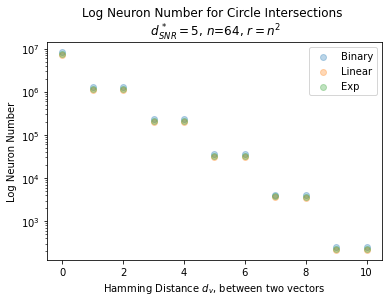

15
Binary
Linear
Exp


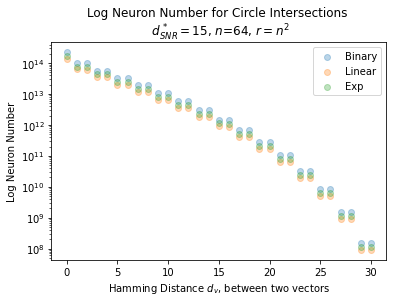

25
Binary
Linear
Exp


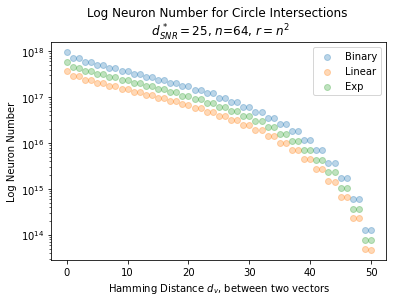

In [94]:
n=64
hamm_distances = [5,15,25]#[480,405, 180]#space_frac_to_hamm_dist(n, space_frac_rang)
r = 2**n#1 #1000000 # number of neurons
use_log = True
for hamm_dist in hamm_distances:
    print(hamm_dist)
    for weight_type in ["Binary", "Linear", "Exp"]:

        print(weight_type)
        # circles that have centers at all distances within this given range. 
        circle_center_distances = np.arange(0,(2*hamm_dist)+1,1).astype(int)
        res = expected_intersection_interpretable(n, circle_center_distances, 
                                                  hamm_dist, r, weight_type=weight_type)
        if use_log:
            y = res
        else: 
            y = res/sum(res)
        plt.scatter(circle_center_distances, y, 
                    label=weight_type, alpha=0.3)

        #plt.plot(circle_center_distances, np.exp( (n//2)-1-circle_center_distances), label='exp') # need to flip so its a decay
    plt.legend()
    if use_log:
        plt.yscale('log')
        prefix="Log Neuron Number"
    else: 
        prefix="Normalized Weight"
    plt.xlabel('Hamming Distance $d_v$, between two vectors')
    plt.ylabel(prefix)
    plt.title(prefix+" for Circle Intersections \n $d^*_{SNR}=$"+str(hamm_dist)+", $n$="+str(n)+", $r=n^2$")
    plt.gcf().savefig(f'{hamm_dist}_NormalizedCircleInterWeights_logged={use_log}.png', dpi=250)
    plt.show()

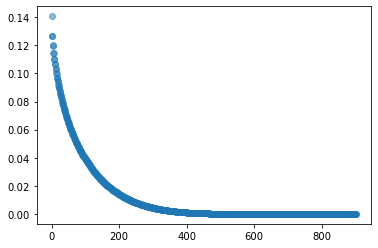

In [29]:
plt.scatter(circle_center_distances, res, 
                    label=weight_type, alpha=0.5)

# Looking at how the weightings interact

In [80]:
n=1000
a = n-dv
bvals = 300
dval = dv
((a+bvals)/n) * ( (a+(dval-bvals))/n )

0.48999999999999994

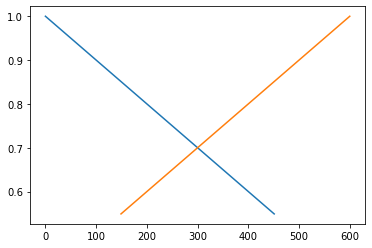

In [29]:
x = np.linspace(0,1000)
d = 451
a = np.linspace(0,451)
plt.plot(a, (1000-a)/1000) 
dv = 600
b = np.linspace(dv-d,dv)

plt.plot(b, (1000-(dv-b))/1000 )

In [23]:
len( ((1000-a)/1000) *(1000-(dv-b))/1000 )

50

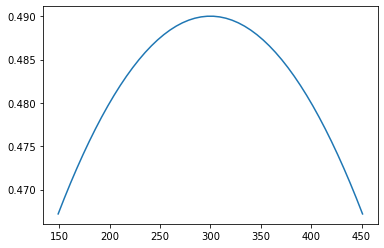

In [63]:
delta = ( ( (dv/2) -d - d) /2 )
inter_r = np.linspace(dv- d, d)

plt.plot(inter_r, ((1000-inter_r)/1000) *(1000-(dv-inter_r))/1000 ) 

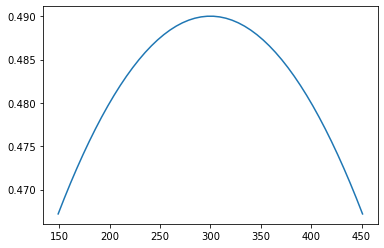

In [74]:
n=1000
plt.plot(inter_r, ((n-dv)/n) + ((-inter_r**2 + inter_r*dv)/(n**2)) ) 

0.9024330274885465
0.7224622653061225
0.48999050354019164


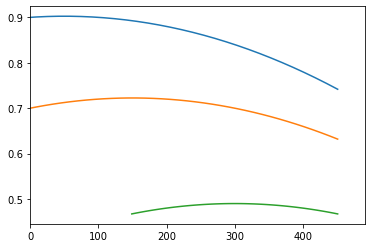

In [89]:
n=1000

for dv_t in [100,300, 600]:
    delta = ( ( (dv_t/2) -d - d) /2 )
    inter_r = np.linspace(dv_t- d, d)

    plt.plot(inter_r, ((n-dv_t)/n) + ((-inter_r**2 + inter_r*dv_t)/(n**2)) )
    print(np.max(((n-dv_t)/n) + ((-inter_r**2 + inter_r*dv_t)/(n**2))))
plt.xlim(left=0)
plt.show()

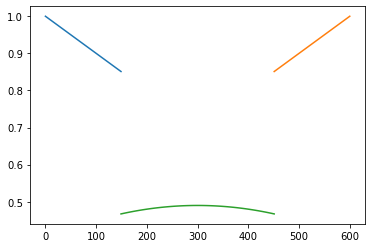

In [64]:

a_ex = np.linspace(0,dv- d) # exclusive a
b_ex = np.linspace(d,dv) # exclusive a
plt.plot(a_ex, (1000-a_ex)/1000)
plt.plot(b_ex, (1000-(dv-b_ex))/1000 )

plt.plot(inter_r, ((1000-inter_r)/1000) *(1000-(dv-inter_r))/1000 ) 

## Exp

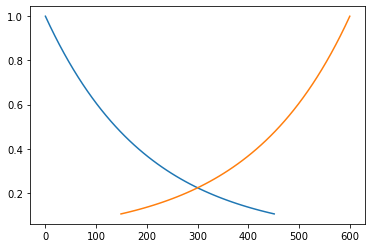

In [49]:
beta = 0.005

plt.plot(a,  np.exp(-beta*a) ) 
plt.plot(b, np.exp(-beta*(dv-b))  )

[0.10487354 0.10487354 0.10487354 0.10487354 0.10487354 0.10487354
 0.10487354 0.10487354 0.10487354 0.10487354 0.10487354 0.10487354
 0.10487354 0.10487354 0.10487354 0.10487354 0.10487354 0.10487354
 0.10487354 0.10487354 0.10487354 0.10487354 0.10487354 0.10487354
 0.10487354 0.10487354 0.10487354 0.10487354 0.10487354 0.10487354
 0.10487354 0.10487354 0.10487354 0.10487354 0.10487354 0.10487354
 0.10487354 0.10487354 0.10487354 0.10487354 0.10487354 0.10487354
 0.10487354 0.10487354 0.10487354 0.10487354 0.10487354 0.10487354
 0.10487354 0.10487354]


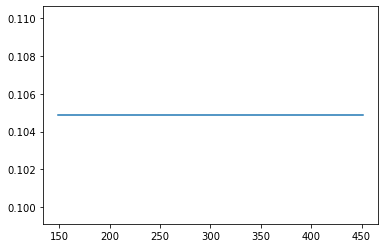

In [52]:

inter_r = np.linspace(dv- d, d)
y = np.exp(-beta*a) * np.exp(-beta*(dv-b))
print(y)
plt.plot(inter_r, y ) 

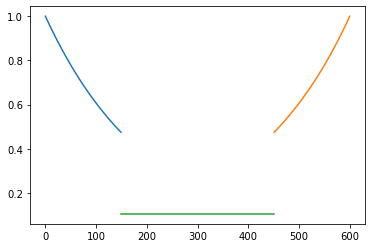

In [51]:
a_ex = np.linspace(0,dv - d) # exclusive a
b_ex = np.linspace(d,dv) # exclusive a
plt.plot(a_ex, np.exp(-beta*a_ex))
plt.plot(b_ex, np.exp(-beta*(dv-b_ex)) )

plt.plot(inter_r, np.exp(-beta*a) * np.exp(-beta*(dv-b)) ) 

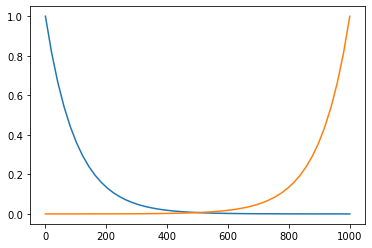

In [5]:
x = np.linspace(0,1000)
beta = 0.01
plt.plot(x, np.exp(-beta*x) )
plt.plot(x, np.exp(-beta*(1000-x)) )

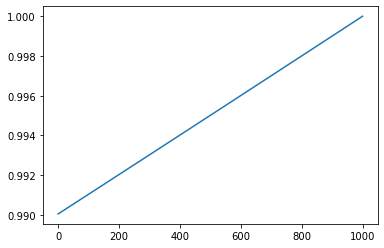

In [39]:
x = np.linspace(0,1000)
beta = 0.00001
plt.plot(x, np.exp(-beta*(1000-x)) )

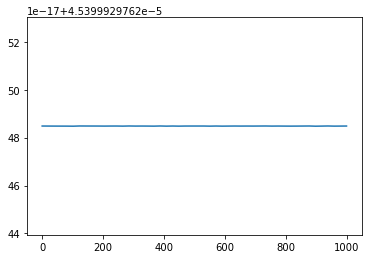

In [17]:
beta=0.01
plt.plot(x, np.exp(-beta*x)*np.exp(-beta*(1000-x)) )
#plt.xlim([300,700])

In [18]:
np.exp(-beta*1000)

4.5399929762484854e-05